# Load Data

In [1]:
# import modules
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#read the csv
file_id = '1I1zR5SDouyMiylwCfl70CgZr-V_CQH4a'
downloaded = drive.CreateFile({'id': file_id})
# allows you to temporarily load your file in the notebook VM

downloaded.GetContentFile('data-raw.csv')

# # read data
df = pd.read_csv('data-raw.csv', delimiter='\t')

# Data Analysis

In [3]:
# drop unnecessary column after manual checking
df = df.drop(df.columns[50:], axis=1)

In [4]:
# drop null
df.dropna(inplace=True)

In [5]:
# questions for each groups
EXT_Questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

EST_Questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

AGR_Questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

CSN_Questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

OPN_Questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

In [6]:
# group names and columns
Extroversion = [column for column in df if column.startswith('EXT')]
Neuroticism = [column for column in df if column.startswith('EST')]
Agreeableness = [column for column in df if column.startswith('AGR')]
Conscientiousness = [column for column in df if column.startswith('CSN')]
Openness_to_Experience = [column for column in df if column.startswith('OPN')]

In [7]:
# define function to visualize data
def vis_questions(groupname, questions, color):
  plt.figure(figsize=(40,50))
  for i in range(1,11):
    plt.subplot(10,5,i)
    plt.hist(df[groupname[i-1]], bins=14, color=color, alpha=0.5)
    plt.title(questions[groupname[i-1]], fontsize=20)

Extroversion Personality


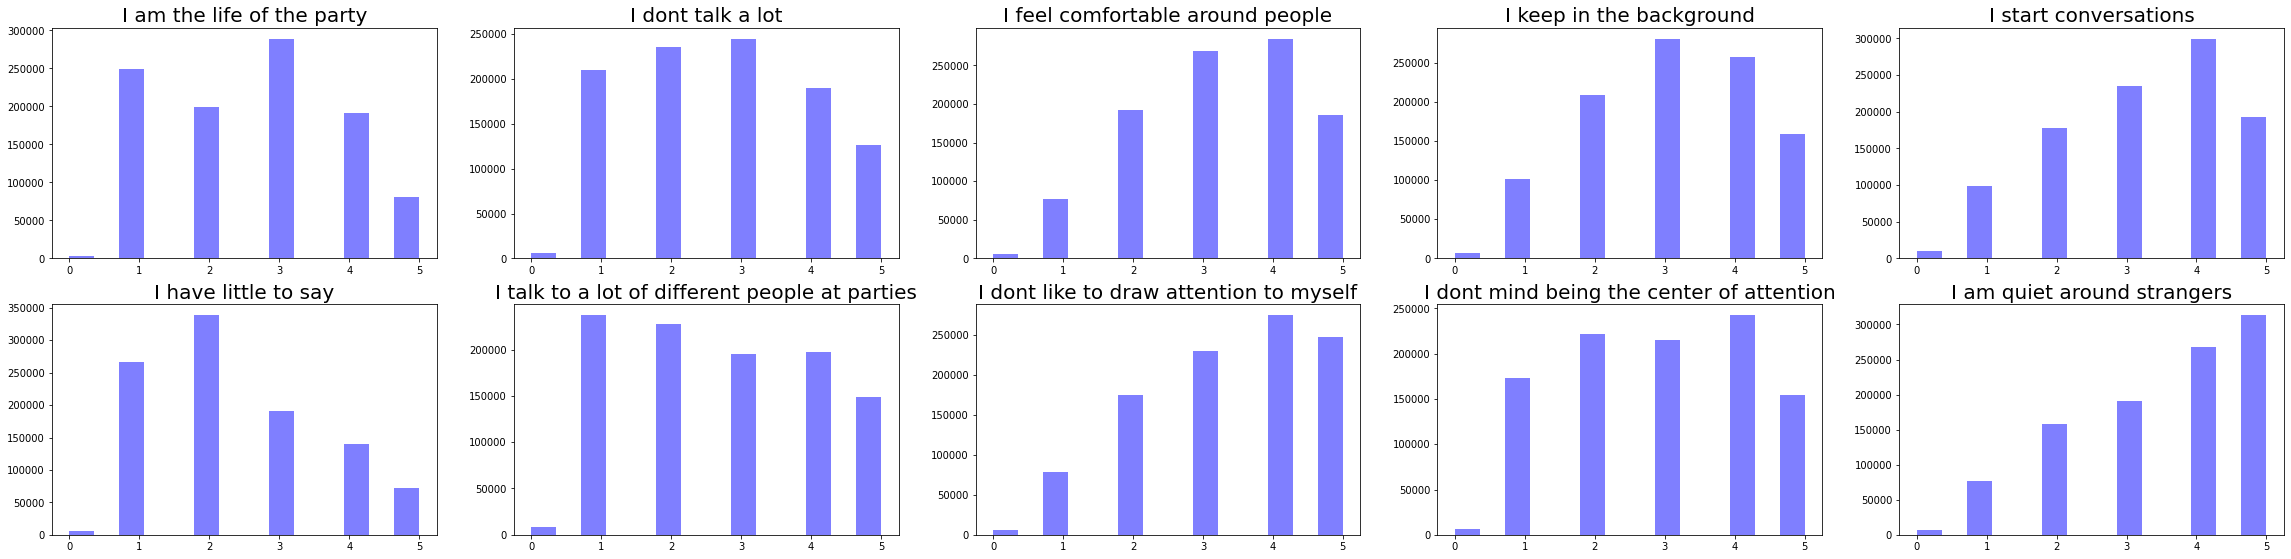

In [8]:
# visualization from EXT data
print('Extroversion Personality')
vis_questions(Extroversion, EXT_Questions, 'blue')

Neuroticism Personality


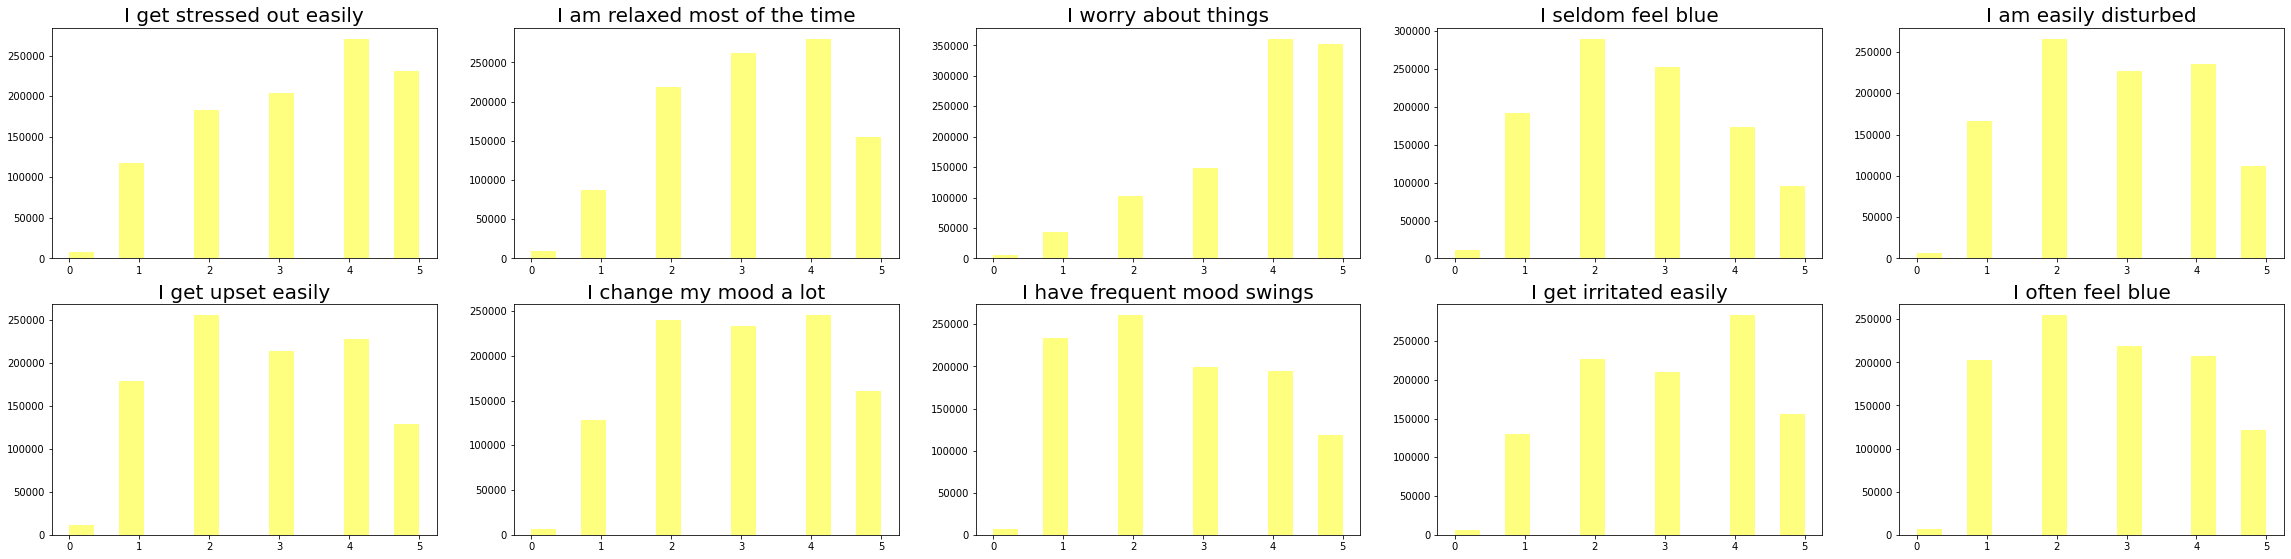

In [9]:
# visualization from EST data
print('Neuroticism Personality')
vis_questions(Neuroticism, EST_Questions, 'yellow')

Agreeableness Personality


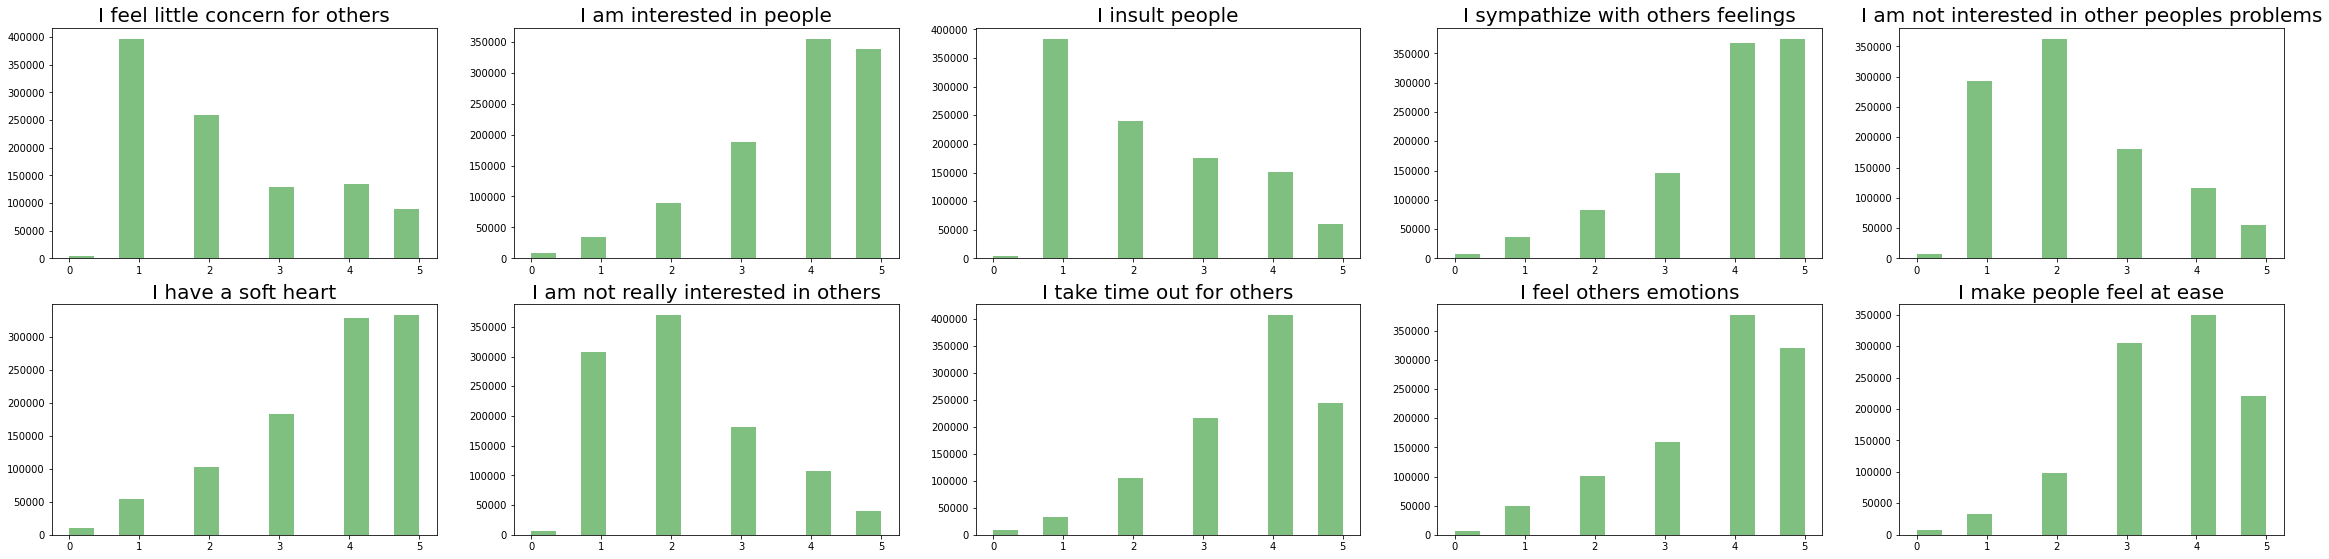

In [10]:
# visualization from AGR data
print('Agreeableness Personality')
vis_questions(Agreeableness, AGR_Questions, 'green')

Conscientiousness Personality


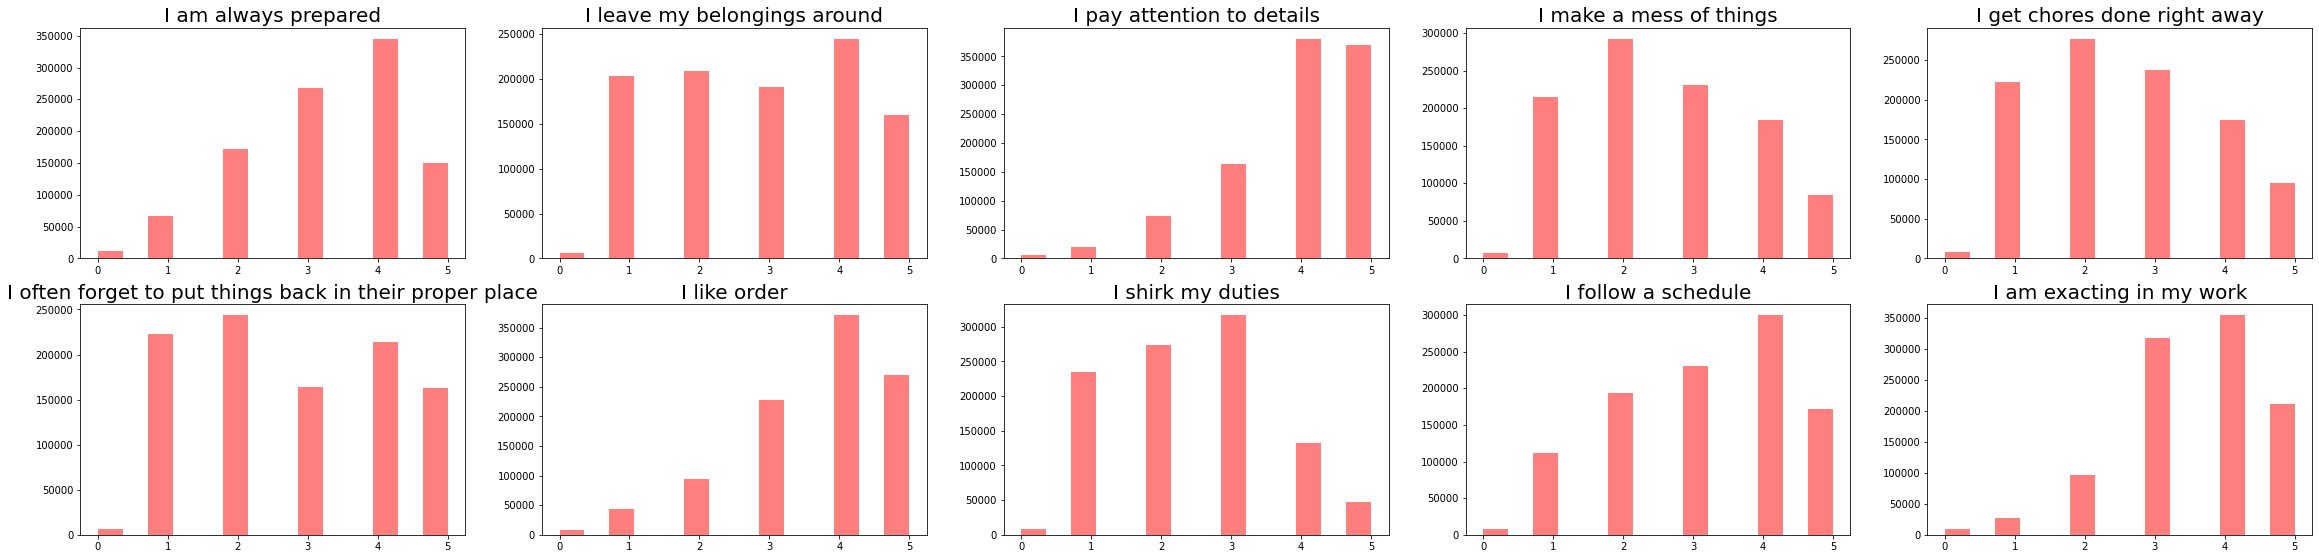

In [11]:
# visualization from CSN data
print('Conscientiousness Personality')
vis_questions(Conscientiousness, CSN_Questions, 'red')

Openness to Experience Personality


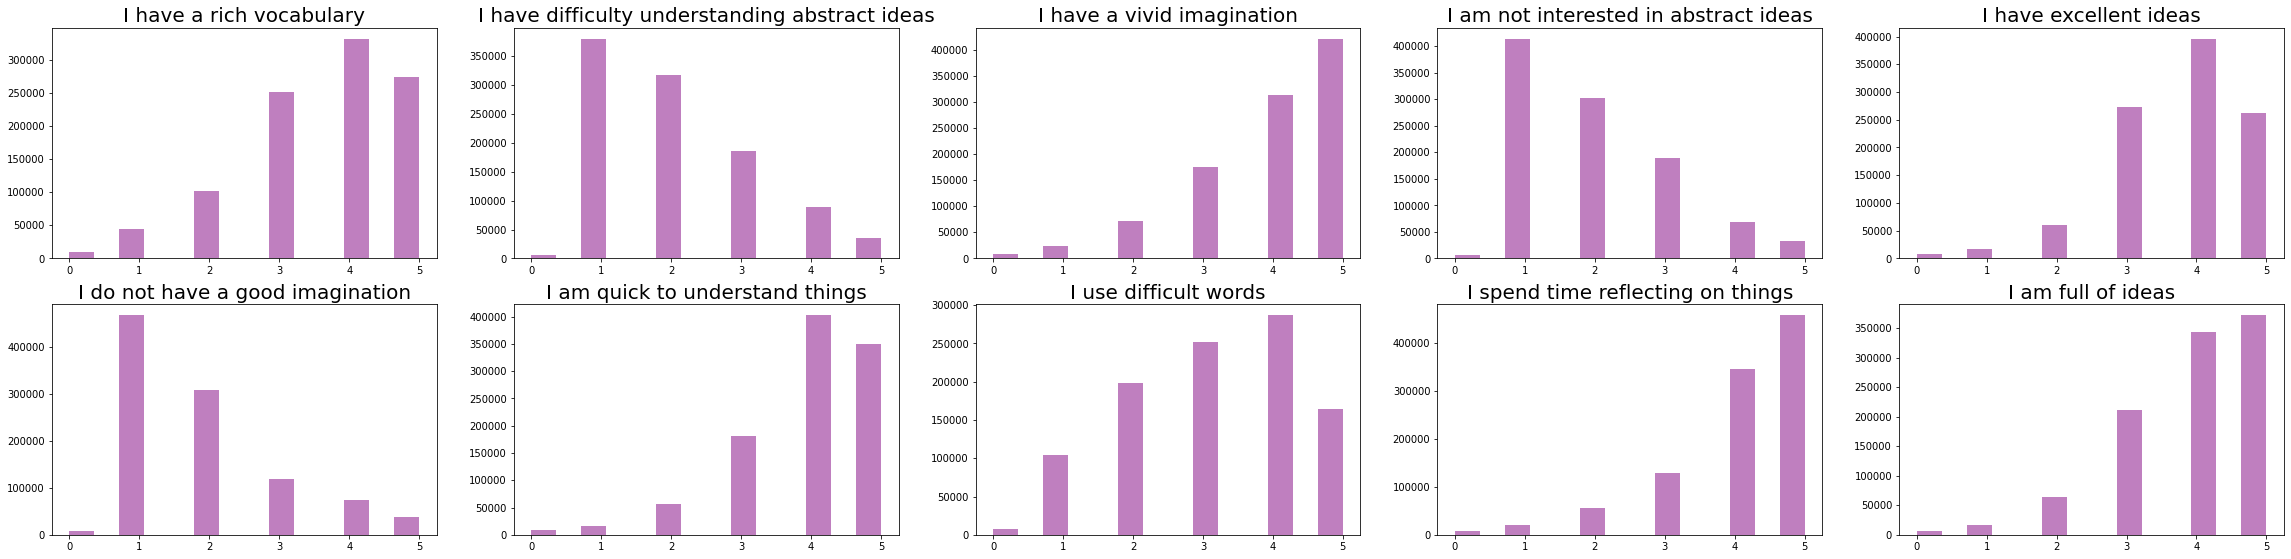

In [12]:
# visualization from OPN data
print('Openness to Experience Personality')
vis_questions(Openness_to_Experience, OPN_Questions, 'purple')

# Clustering

In [13]:
# import module
from sklearn.cluster import KMeans

# clustering into 5 personality groups
df_model=df
K_Means=KMeans(n_clusters=5)
k_fit=K_Means.fit(df_model)

In [14]:
# predicting the clusters
pd.options.display.max_columns=10
pred=k_fit.labels_
df['Clusters'] = pred
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,3
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,4
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,4
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,2
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,3


In [15]:
# display the spread of values for each cluster
df.Clusters.value_counts()

0    227130
4    213036
3    209438
1    201003
2    162951
Name: Clusters, dtype: int64

In [16]:
# summing up the different questions groups
col_list=list(df_model)
EXT = col_list[0:10]
EST = col_list[10:20]
AGR = col_list[20:30]
CSN = col_list[30:40]
OPN = col_list[40:50]

data_sum=pd.DataFrame()
data_sum['Extroversion']=df_model[EXT].sum(axis=1)/10
data_sum['Neuroticism']=df_model[EST].sum(axis=1)/10
data_sum['Agreeableness']=df_model[AGR].sum(axis=1)/10
data_sum['Conscientiousness']=df_model[CSN].sum(axis=1)/10
data_sum['Openness to Experience']=df_model[OPN].sum(axis=1)/10
data_sum['Clusters']=pred
data_sum.groupby('Clusters').mean()

,Extroversion,Neuroticism,Agreeableness,Conscientiousness,Openness to Experience
Clusters,,,,,
0,3.072237,3.427261,3.300099,3.211457,3.352303
1,2.966198,3.646262,3.149434,3.173743,3.245856
2,2.908781,2.528469,2.850828,2.914744,3.120725
3,3.085160,2.422993,3.208826,3.106589,3.327637
4,3.052713,2.977497,3.187425,3.158087,3.242711


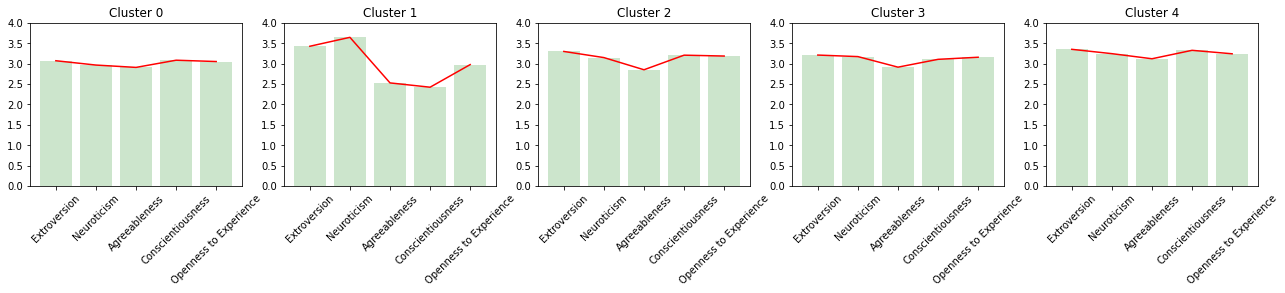

In [17]:
# visualize the mean for each cluster
data_clusters = data_sum.groupby('Clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(data_clusters.columns, data_clusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(data_clusters.columns, data_clusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

# One Hot Encoding

In [20]:
# import module
from sklearn.preprocessing import LabelBinarizer

# one hot encoding for 5 types -> 5 columns
y = LabelBinarizer().fit_transform(df.Clusters)
y = pd.DataFrame(y, columns = ['0','1','2','3','4'])

In [21]:
# count each label
count_label = tf.reduce_sum(y, axis=0)
for i in range(len(count_label) ):
    print("{} {}".format(y.columns[i], count_label[i]))

0 227130
1 201003
2 162951
3 209438
4 213036


# ANN

In [22]:
from sklearn.model_selection import train_test_split

# define train and validation
x = df.drop('Clusters', axis=1)
y.astype(int)

# split dataframe 80% train, 20% test
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.1, random_state=43)

In [23]:
# rescale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# train
train_x = scaler.fit_transform(train_x.astype(np.float64))
# test
test_x = scaler.fit_transform(test_x.astype(np.float64))

In [24]:
# neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape=(50,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 5, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_x, train_y, epochs =5)

Epoch 1/5
28507/28507 [==============================] - 42s 1ms/step - loss: 0.1583 - accuracy: 0.9361
Epoch 2/5
28507/28507 [==============================] - 42s 1ms/step - loss: 0.0965 - accuracy: 0.9590
Epoch 3/5
28507/28507 [==============================] - 41s 1ms/step - loss: 0.0848 - accuracy: 0.9640
Epoch 4/5
28507/28507 [==============================] - 41s 1ms/step - loss: 0.0788 - accuracy: 0.9665
Epoch 5/5
28507/28507 [==============================] - 42s 1ms/step - loss: 0.0736 - accuracy: 0.9689


# Evaluate the Model

In [25]:
# evaluate
test_loss, test_accuracy = model.evaluate(test_x, test_y)
print(test_loss, test_accuracy)

3168/3168 [==============================] - 3s 1ms/step - loss: 0.0545 - accuracy: 0.9760
0.05450635775923729 0.9760251045227051


In [26]:
#try prediction
pred = model.predict([[2,2,2,3,4,2,2,4,1,4,3,3,3,2,3,2,2,2,4,3,2,4,3,4,2,4,2,4,3,4,2,4,4,4,1,2,2,3,1,4,4,2,5,2,3,1,4,4,3,3]])
print(pred)

[[1.000000e+00 5.985053e-29 0.000000e+00 0.000000e+00 0.000000e+00]]


# Export to TFLite Model

In [27]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmps9ldi1yb/assets
